In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# !pip install pandas-profiling

In [ ]:
# !pip install pydantic==1.10.11
# from pandas_profiling import ProfileReport
# from ydata_profiling import ProfileReport

In [ ]:
df = pd.read_csv('Financial Statements.csv')

def print_full(df):
    import pandas as pd
    pd.set_option('display.max_rows', len(df))
    print(df)
    pd.reset_option('display.max_rows')

df.sample(5)

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
156,2013,AMZN,LOGI,182.54,74452.0,20271.0,274.0,0.0295,3998.0,9746.0,...,1.0716,0.3274,2.8114,0.6823,2.1180,0.3680,0.1748,3.8641,117300,1.4648
136,2019,INTC,ELEC,260.35,71965.0,42140.0,21048.0,4.7100,32861.0,77504.0,...,1.4002,0.3742,27.1573,15.4171,20.4723,29.2476,0.7539,52.0977,110800,1.8122
135,2020,INTC,ELEC,104.16,77867.0,43612.0,20899.0,4.9400,35917.0,81038.0,...,1.9087,0.4492,25.7891,13.6514,18.1833,26.8394,1.2739,46.4000,110600,1.2336
76,2012,PCG,Manufacturing,18.10,15040.0,10017.0,816.0,1.9200,3965.0,13326.0,...,0.8186,1.0062,6.2284,1.5825,3.2117,5.4255,1.3509,6.2284,20593,2.0693
30,2021,GOOG,IT,1910.26,257637.0,146698.0,76033.0,5.6100,91155.0,251635.0,...,2.9281,0.0589,30.2156,21.1633,28.5354,29.5117,1.7123,33.4561,156500,4.6979


In [ ]:
df.columns = ["Год", "Компания", "Отрасль", "Рыночная капитализация",
              "Выручка", "Валовая прибыль", "Чистая прибыль",
              "EPS", "EBITDA", "Акционерный капитал", "CFO",
              "CFI", "CFF", "Коэффициент текущей ликвидности", "D/E", "ROE",
              "ROA", "ROI", "Чистая рентабельность", "FCF per share", "ROTE",
              "Численность персонала", "Инфляция в США"]

In [ ]:
df.isnull().sum()

Год                                0
Компания                           0
Отрасль                            0
Рыночная капитализация             1
Выручка                            0
Валовая прибыль                    0
Чистая прибыль                     0
EPS                                0
EBITDA                             0
Акционерный капитал                0
CFO                                0
CFI                                0
CFF                                0
Коэффициент текущей ликвидности    0
D/E                                0
ROE                                0
ROA                                0
ROI                                0
Чистая рентабельность              0
FCF per share                      0
ROTE                               0
Численность персонала              0
Инфляция в США                     0
dtype: int64

In [ ]:
df['Рыночная капитализация'].fillna(44,inplace=True)

In [ ]:
print(f"В датасете содержится информация о {len(df['Компания'].unique())} различных предприятиях.\n")
df.value_counts('Компания')

В датасете содержится информация о 12 различных предприятиях.



Компания
MSFT     15
NVDA     15
AAPL     14
AIG      14
AMZN     14
BCS      14
GOOG     14
INTC     14
MCD      14
PCG      14
SHLDQ    10
PYPL      9
Name: count, dtype: int64

In [ ]:
print(f"Данные компании из {len(df['Отрасль'].unique()) - 1} различных отраслей.\n")
df.value_counts('Отрасль')

Данные компании из 8 различных отраслей.



Отрасль
IT               43
ELEC             29
BANK             14
Bank             14
FOOD             14
LOGI             14
Manufacturing    14
Finance          10
FinTech           9
Name: count, dtype: int64

In [ ]:
df.describe()

,Год,Рыночная капитализация,Выручка,Валовая прибыль,Чистая прибыль,EPS,EBITDA,Акционерный капитал,CFO,CFI,...,Коэффициент текущей ликвидности,D/E,ROE,ROA,ROI,Чистая рентабельность,FCF per share,ROTE,Численность персонала,Инфляция в США
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,...,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,1.610000e+02,161.000000
mean,2015.608696,335.780683,75862.600758,37383.463124,12276.607076,0.982886,20174.023974,57178.005273,20790.317839,-9581.533232,...,2.035368,0.645520,12.432402,7.780479,11.881350,13.684964,0.192825,24.247542,1.457188e+05,2.231317
std,4.049960,539.905295,90786.895983,41669.093697,19417.421119,8.874504,26342.029803,54098.208311,27300.212516,16196.808177,...,1.660894,2.507177,44.777292,8.802462,93.384692,13.401767,15.412788,109.982817,2.234389e+05,1.959139
min,2009.000000,0.040000,3326.445000,1174.269000,-12244.000000,-90.480000,-6860.000000,-8210.300000,-39392.270000,-59611.000000,...,0.220500,-11.775000,-212.606900,-23.723600,-742.105200,-44.696100,-121.502200,-554.174100,5.420000e+03,-0.355500
25%,2012.000000,41.280000,22820.400000,10396.000000,844.000000,0.340000,2310.000000,12353.000000,3502.000000,-17434.000000,...,1.000000,0.077200,5.080000,0.828200,2.757900,4.827700,-0.361300,6.111800,2.990000e+04,1.261600
50%,2016.000000,112.650000,45992.040000,19561.000000,4757.800000,1.790000,9958.000000,47791.000000,7386.700000,-5904.000000,...,1.341200,0.381800,14.501600,6.641100,13.469400,15.297700,0.265600,19.782200,9.600000e+04,1.812200
75%,2019.000000,356.310000,77849.000000,47722.000000,14136.000000,3.240000,27765.000000,91570.700000,31626.000000,-981.600000,...,2.473400,0.891400,28.189300,14.701600,20.472300,22.934500,0.935400,36.980600,1.470000e+05,2.442600
max,2023.000000,2913.280000,513983.000000,225152.000000,99803.000000,14.980000,130541.000000,256144.000000,122151.000000,49749.000000,...,10.617800,9.332800,196.958900,31.154100,884.860500,36.686300,137.328700,1197.727000,1.608000e+06,8.002800


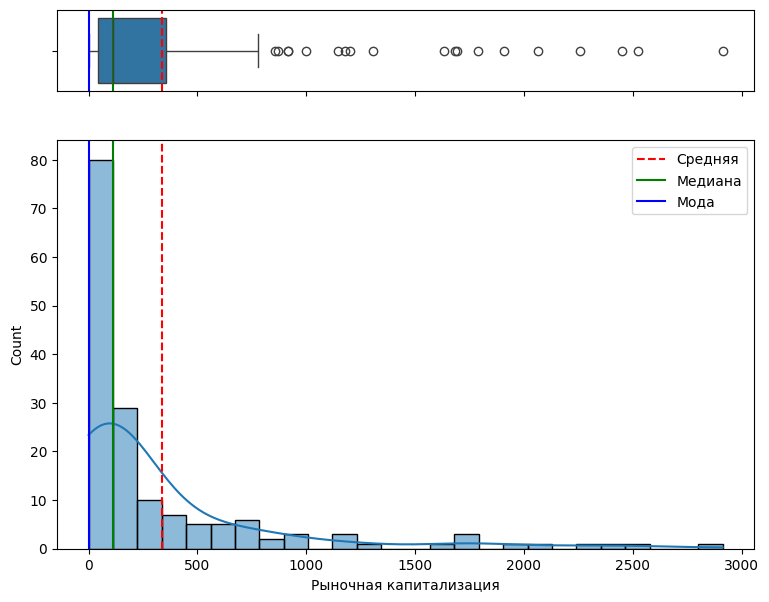

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 9, 7

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['Рыночная капитализация'].mean()
median=df['Рыночная капитализация'].median()
mode=df['Рыночная капитализация'].mode().values[0]

sns.boxplot(data=df, x="Рыночная капитализация", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="Рыночная капитализация", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Средняя")
ax_hist.axvline(median, color='g', linestyle='-', label="Медиана")
ax_hist.axvline(mode, color='b', linestyle='-', label="Мода")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

In [ ]:
print(df['Рыночная капитализация'].mean())
print(df['Рыночная капитализация'].median())
print(df['Рыночная капитализация'].mode().values[0])

335.7806832298137
112.65
0.04


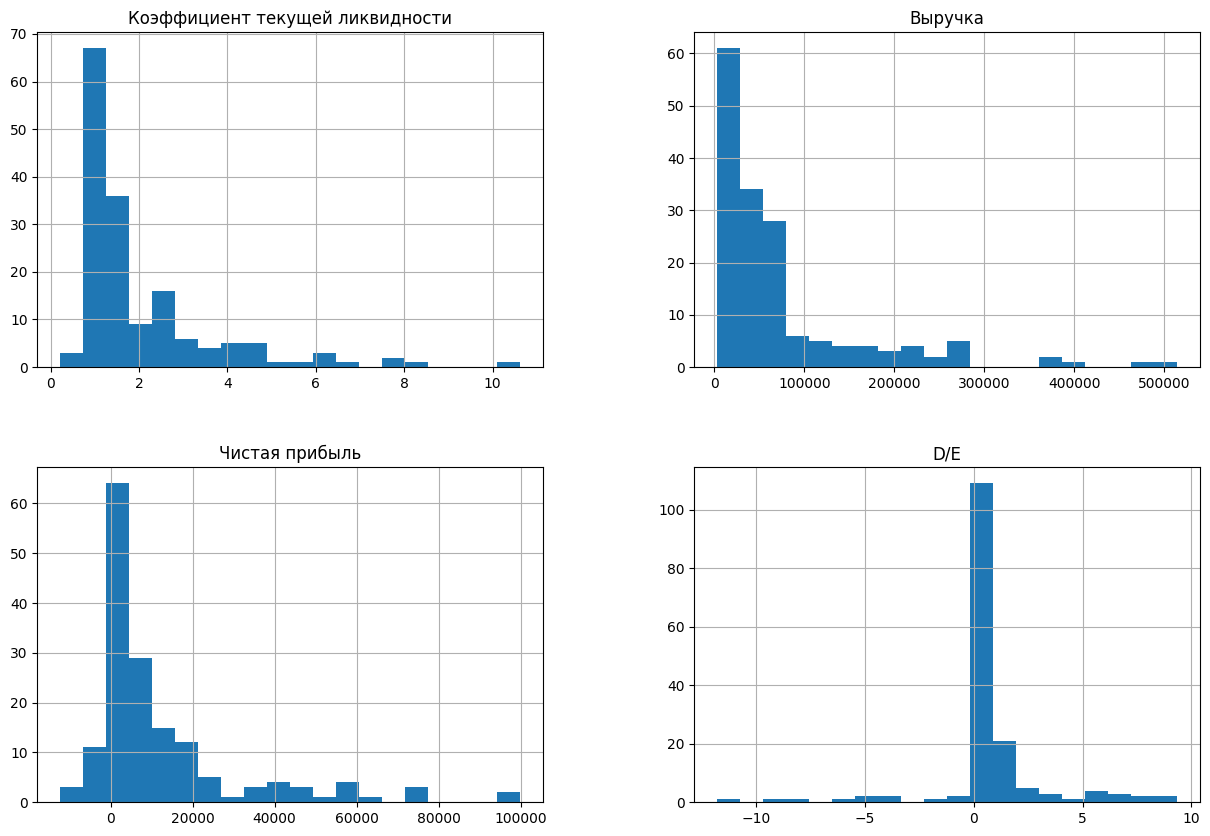

In [ ]:
main_columns = ['Коэффициент текущей ликвидности', 'Выручка', 'Чистая прибыль', 'D/E']
df[main_columns].hist(bins=20, figsize=(15, 10))
#plt.suptitle('Распределение компаний по ключевым параметрам')
plt.show()

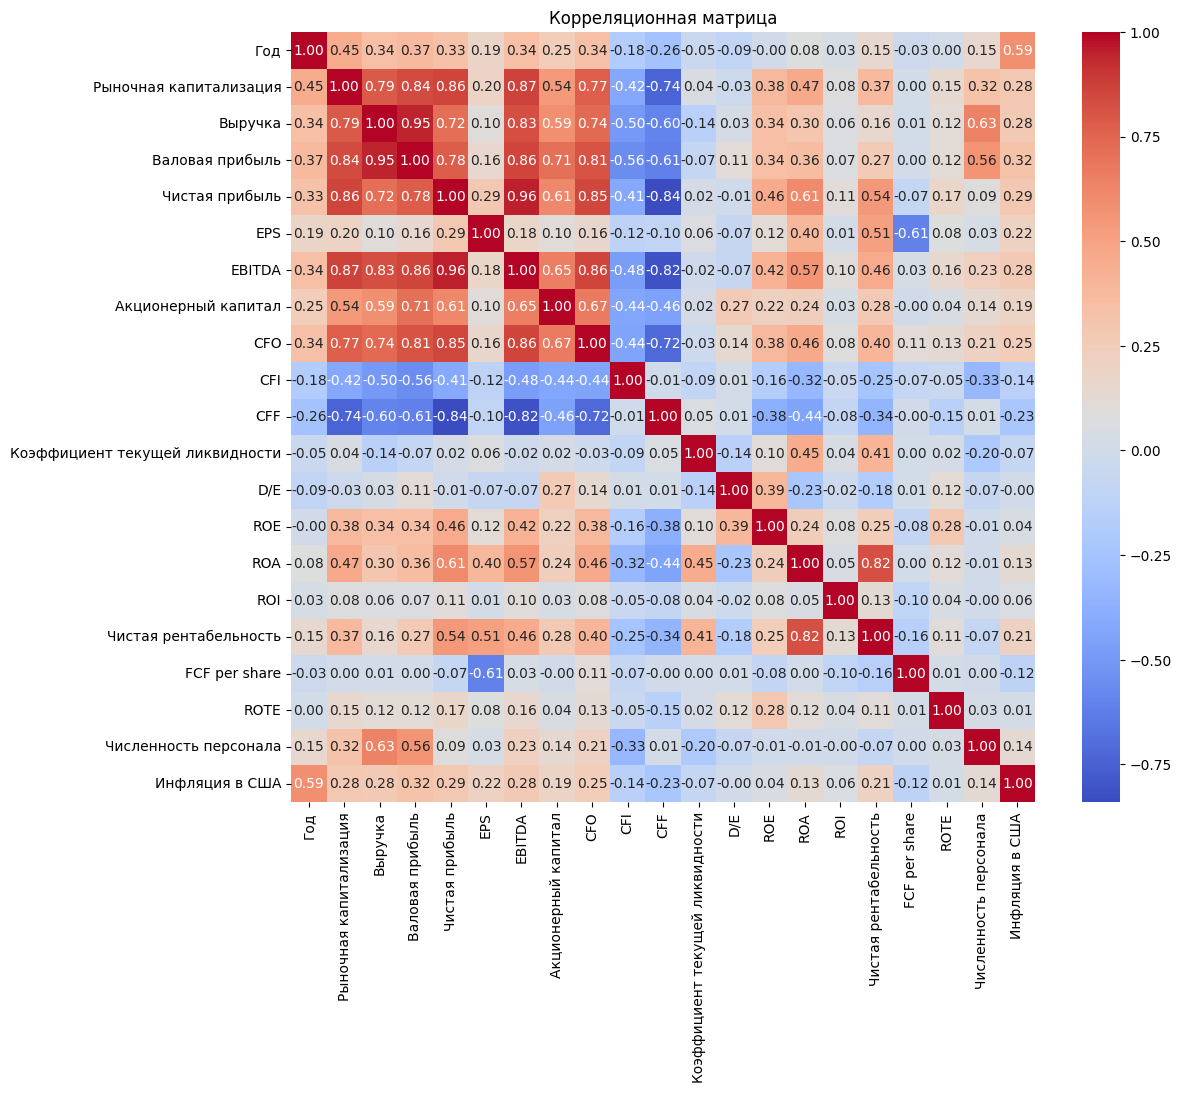

In [ ]:
all_numericals_columns = df.select_dtypes(include=['float64', 'int64']).columns
all_numericals_df = df[all_numericals_columns]
correlation_matrix = all_numericals_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

In [ ]:
main_numericals_columns = ["Рыночная капитализация", "Выручка",
                           "Валовая прибыль", "Чистая прибыль", "EPS", "EBITDA",
                           "Акционерный капитал", "CFO", "CFI", "CFF",
                           "Коэффициент текущей ликвидности", "D/E", "ROE",
                           "ROA", "ROI", "Чистая рентабельность",
                           "FCF per share", "ROTE", "Численность персонала",
                           "Инфляция в США"]

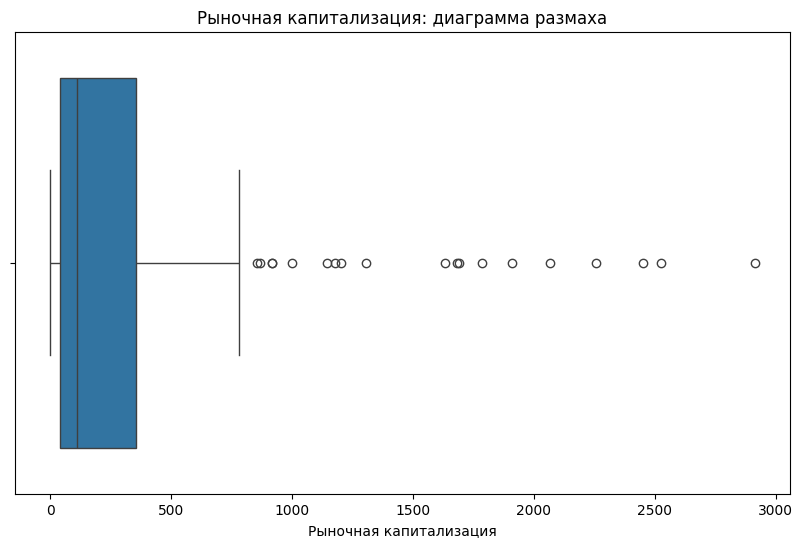

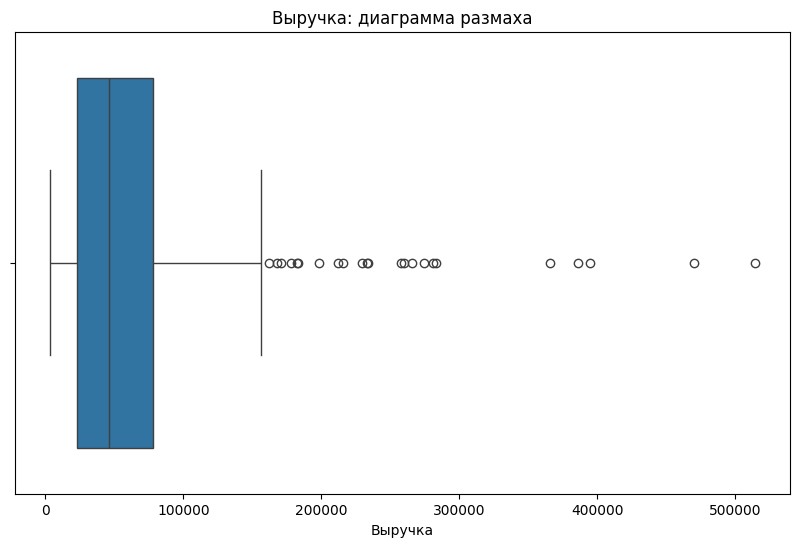

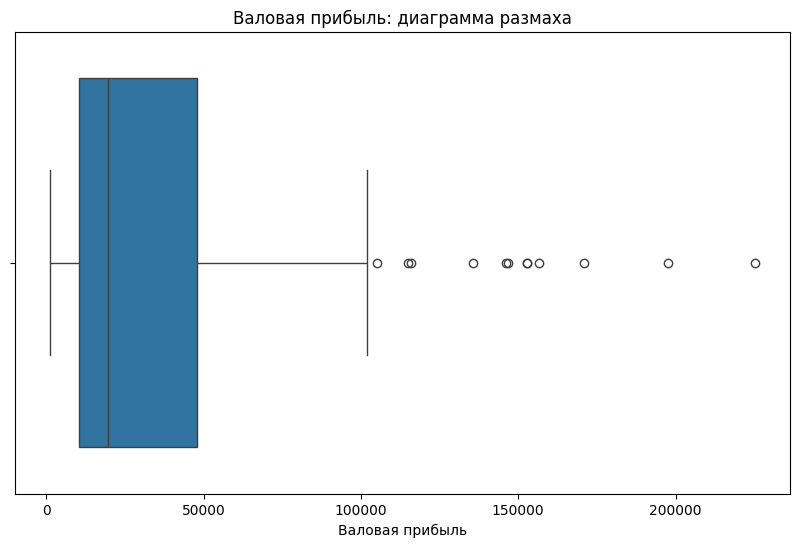

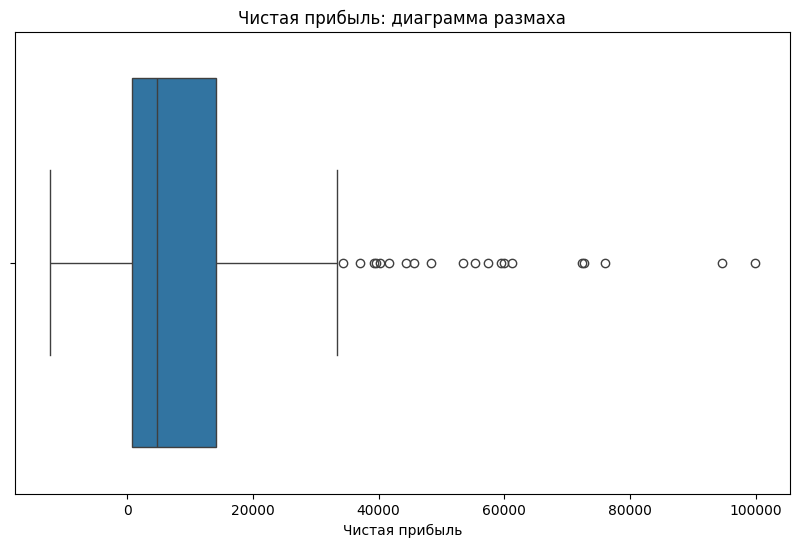

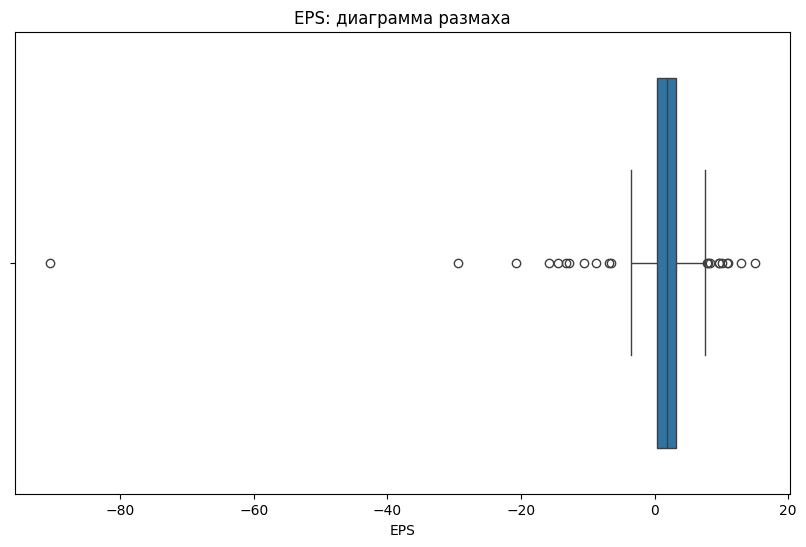

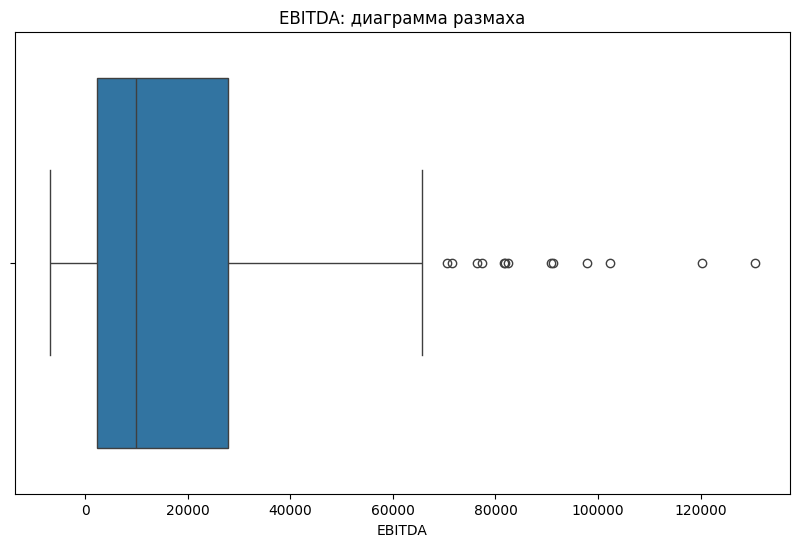

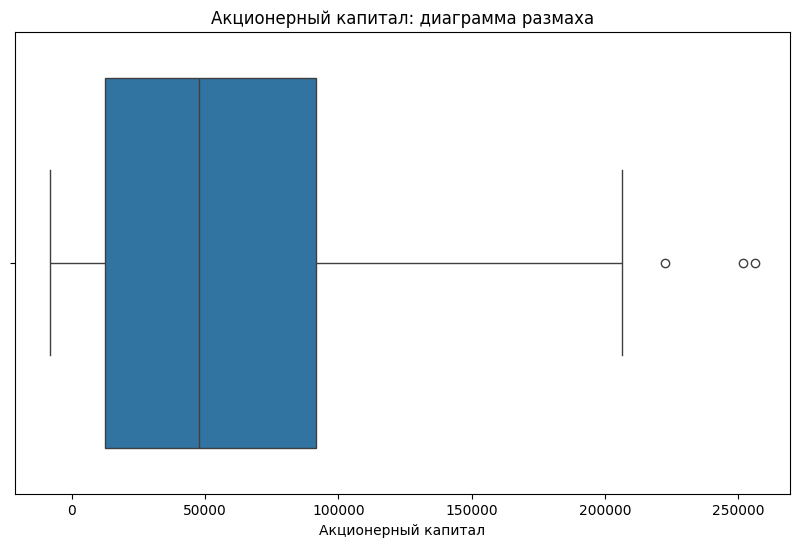

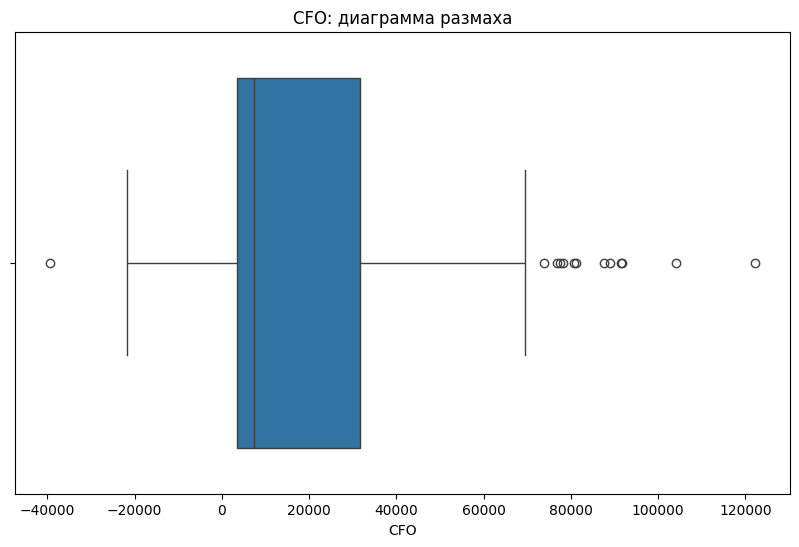

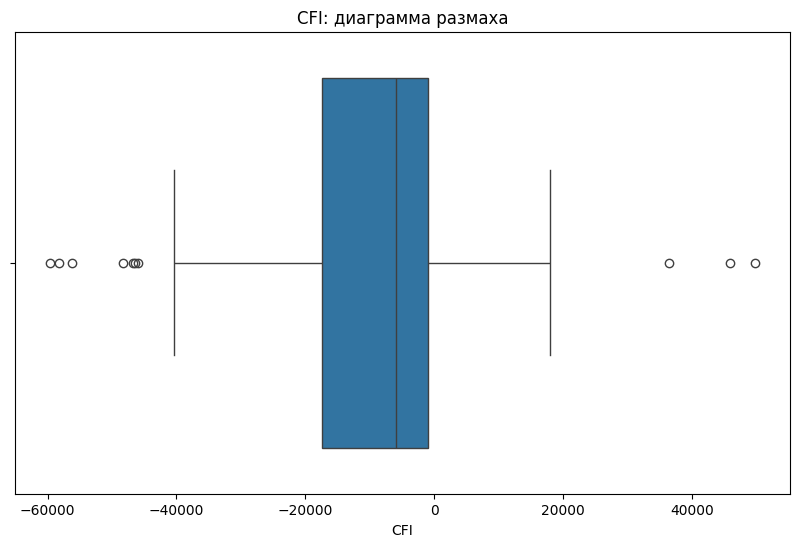

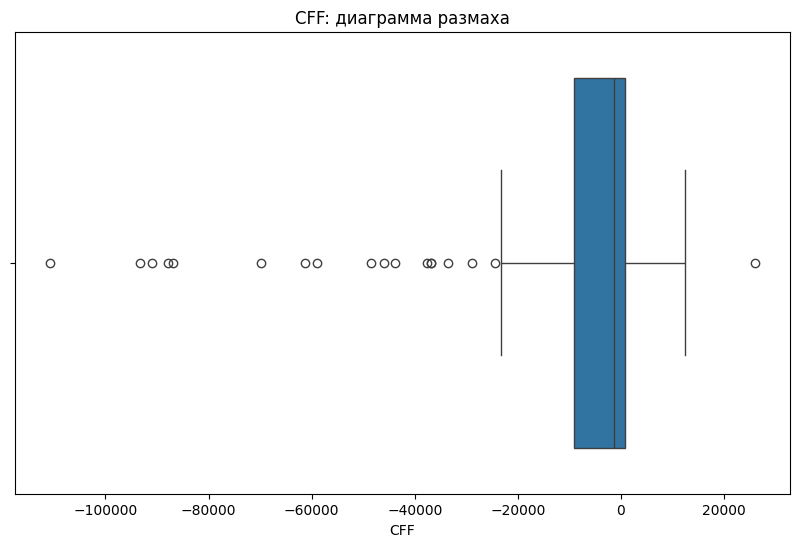

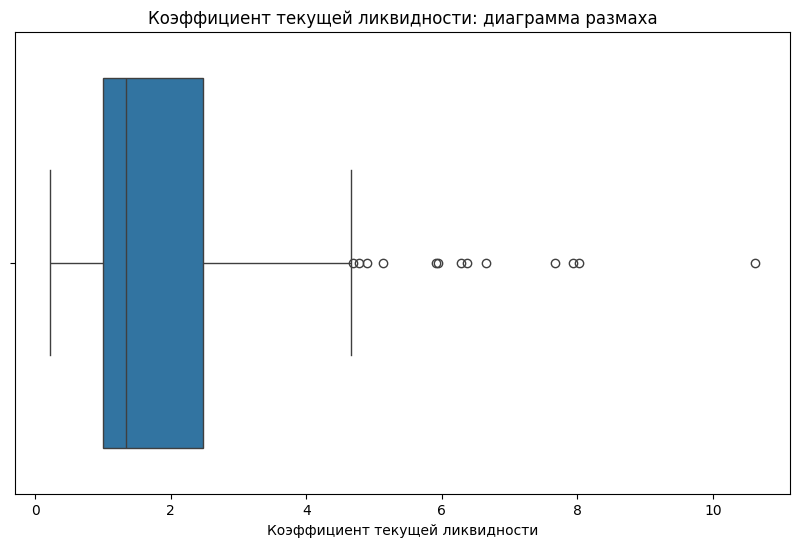

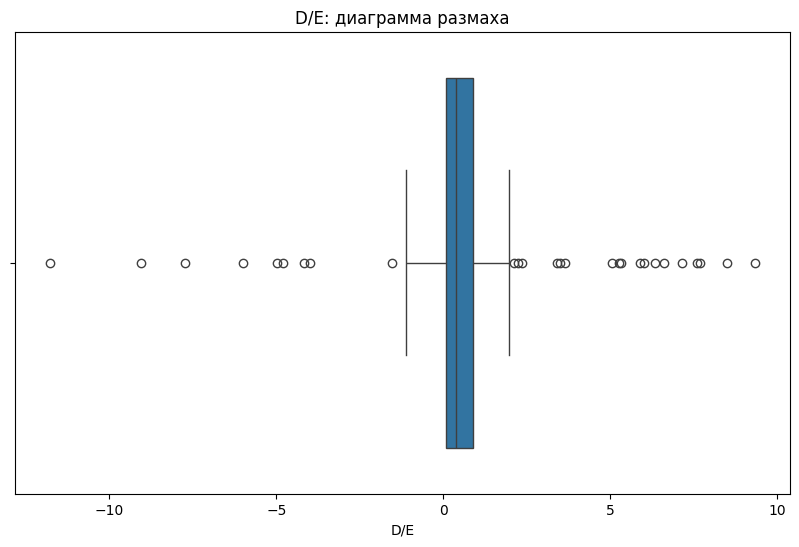

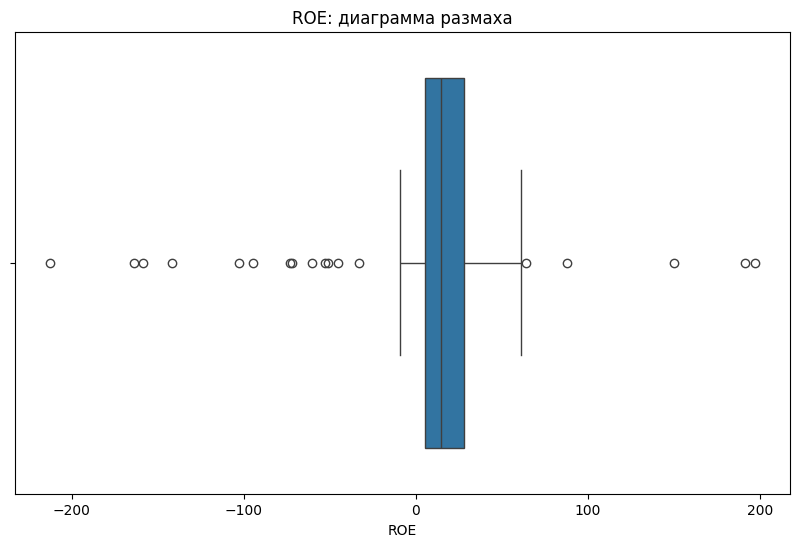

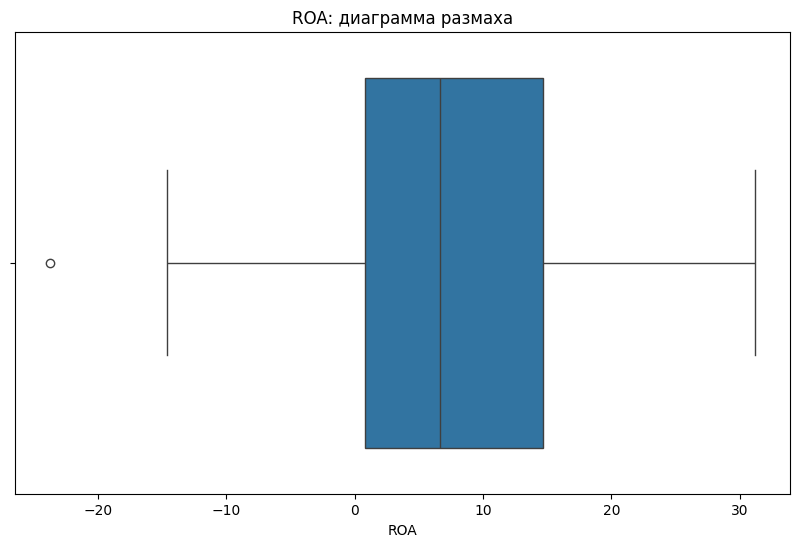

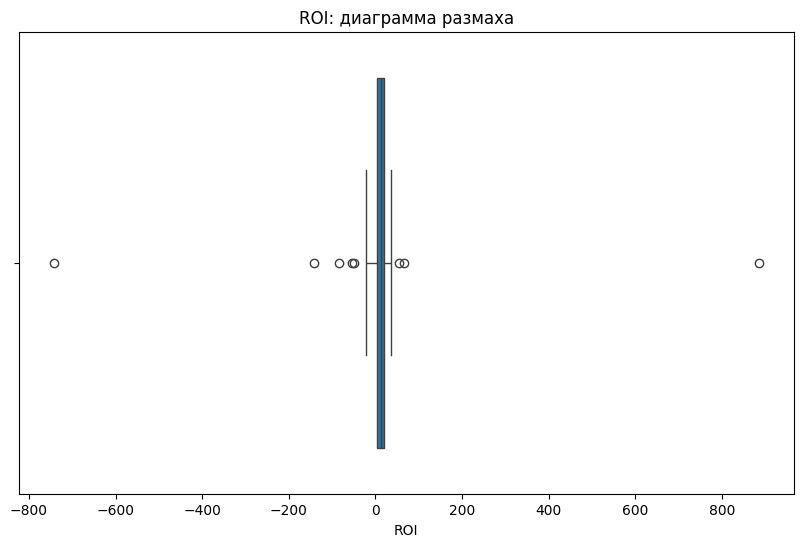

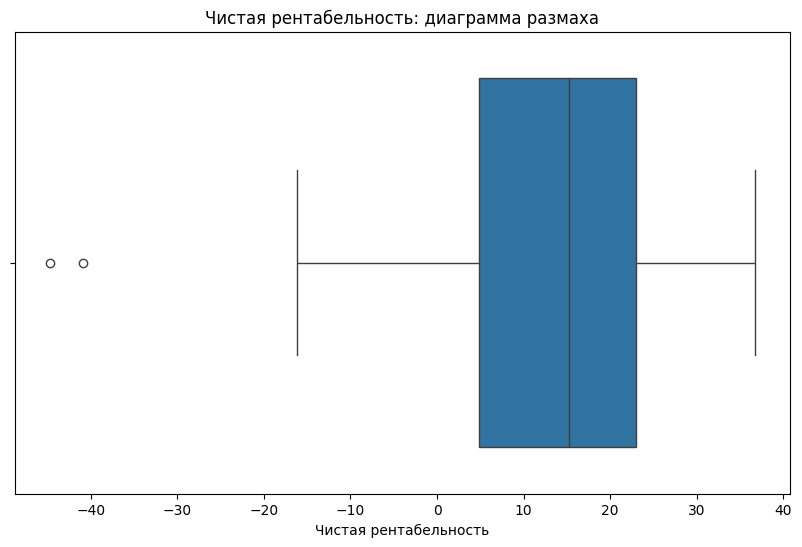

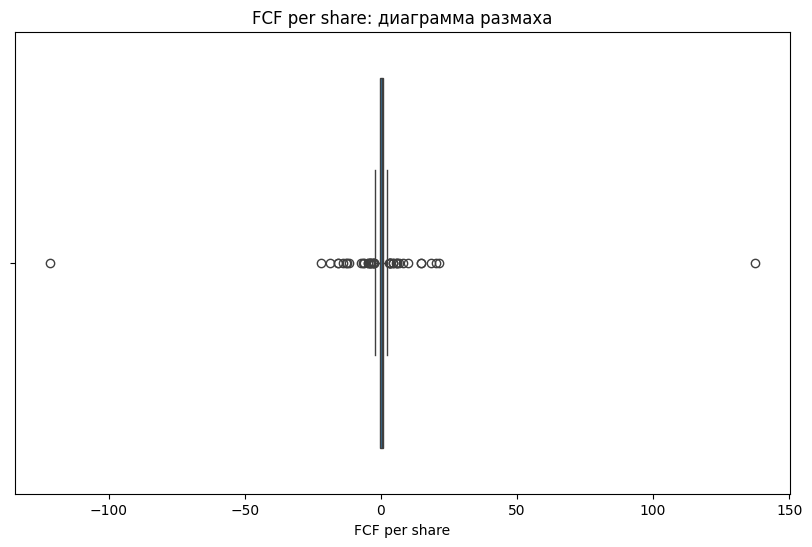

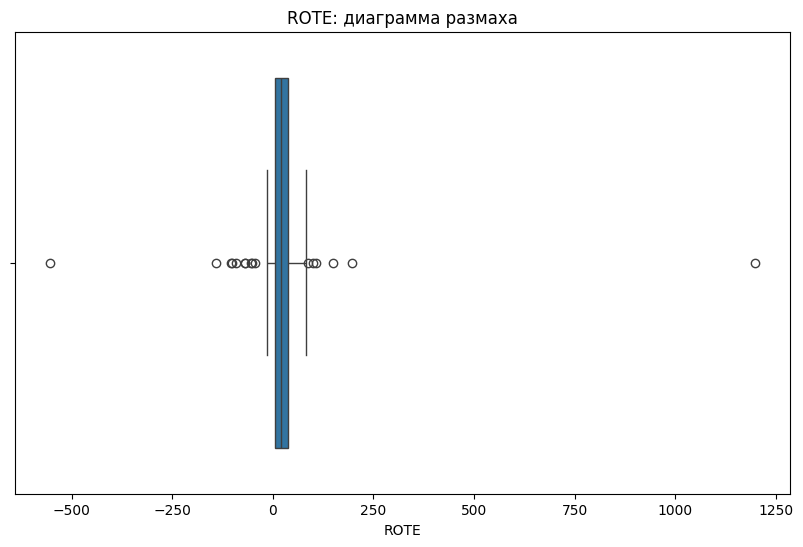

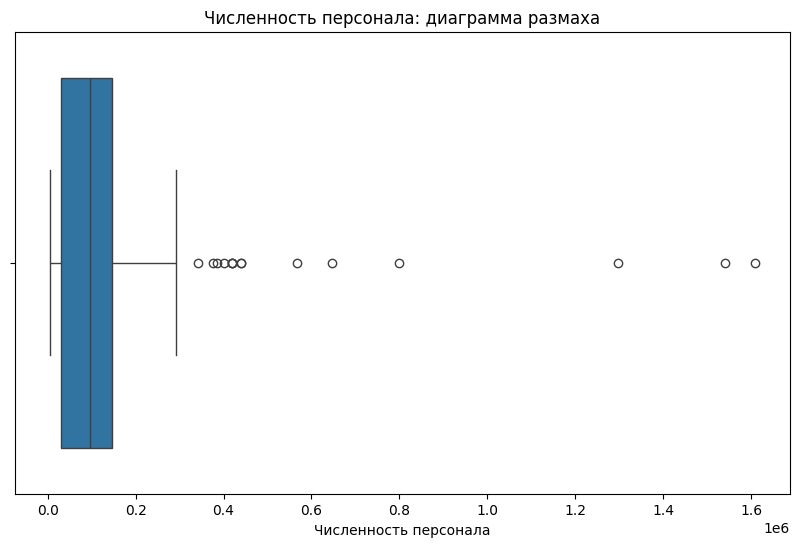

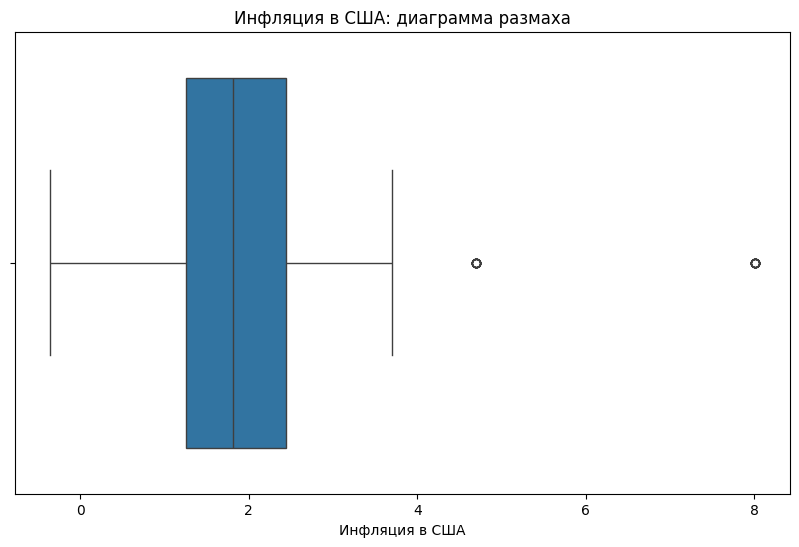

In [ ]:
for col in main_numericals_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'{col}: диаграмма размаха')
    plt.show()

In [ ]:
df['Отрасль']=df['Отрасль'].str.upper()

<ipython-input-18-b9bb379a57a3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Отрасль', y='Рыночная капитализация', data=df, palette='viridis')


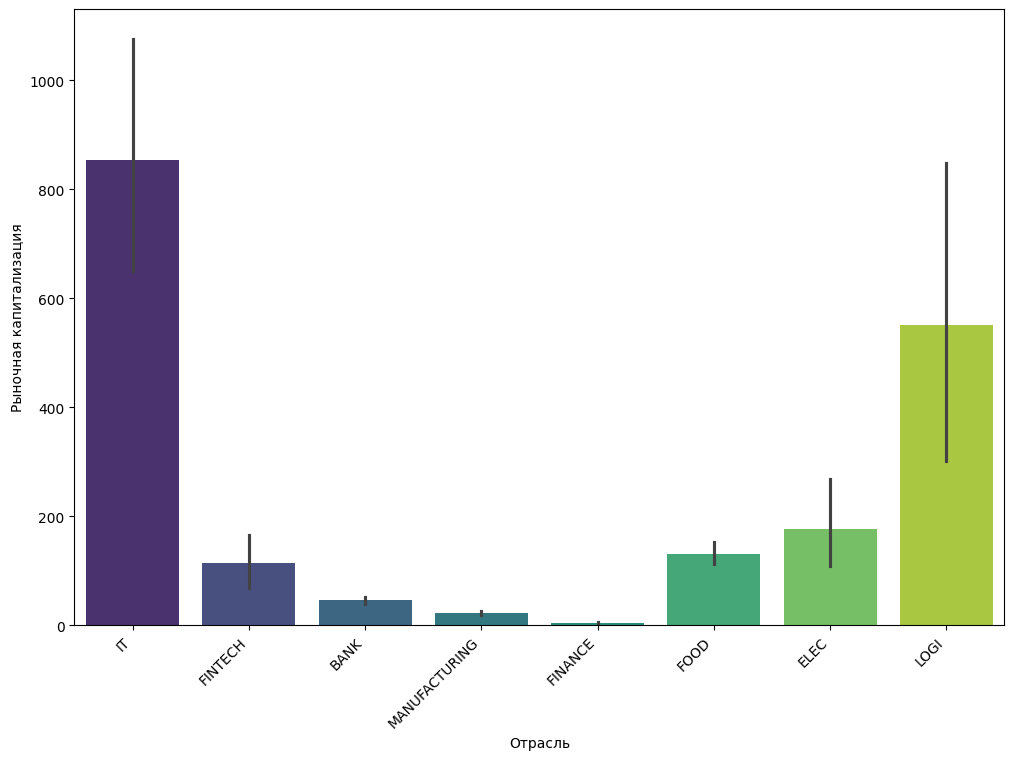

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Отрасль', y='Рыночная капитализация', data=df, palette='viridis')
#plt.xlabel('Отрасль')
#plt.ylabel('Рыночная капитализация')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#!pip install ydata-profiling
#from ydata_profiling import ProfileReport

In [ ]:
#profile = ProfileReport(df, title='Профилированный отчёт (Python-библиотека Ydata-profiling)', explorative=True)

In [ ]:
#profile.to_file("report.html")

In [ ]:
#profile

In [ ]:
df = pd.DataFrame(df.drop(columns = ['Компания', 'Отрасль']))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
df = scaler.transform(df)

In [ ]:
!pip install pycaret[full]

In [ ]:
df.columns

Index(['Год', 'Рыночная капитализация', 'Выручка', 'Валовая прибыль',
       'Чистая прибыль', 'EPS', 'EBITDA', 'Акционерный капитал', 'CFO', 'CFI',
       'CFF', 'Коэффициент текущей ликвидности', 'D/E', 'ROE', 'ROA', 'ROI',
       'Чистая рентабельность', 'FCF per share', 'ROTE',
       'Численность персонала', 'Инфляция в США'],
      dtype='object')

In [ ]:
from pycaret.regression import *
s = setup(df, target = 'Рыночная капитализация', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Рыночная капитализация
2,Target type,Regression
3,Original data shape,"(161, 21)"
4,Transformed data shape,"(161, 21)"
5,Transformed train set shape,"(112, 21)"
6,Transformed test set shape,"(49, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

In [ ]:
catboost_model = create_model('catboost')

In [ ]:
evaluate_model(catboost_model)

In [ ]:
new_data = df.copy()
new_data.drop('Рыночная капитализация', axis=1, inplace=True)
new_data.head()

,Год,Выручка,Валовая прибыль,Чистая прибыль,EPS,EBITDA,Акционерный капитал,CFO,CFI,CFF,Коэффициент текущей ликвидности,D/E,ROE,ROA,ROI,Чистая рентабельность,FCF per share,ROTE,Численность персонала,Инфляция в США
0,2022,394328.0,170782.0,99803.0,6.11,130541.0,50672.0,122151.0,-22354.0,-110749.0,0.8794,2.3695,196.9589,28.2924,66.6994,25.3096,1.3146,196.9589,164000,8.0028
1,2021,365817.0,152836.0,94680.0,5.61,120233.0,63090.0,104038.0,-14545.0,-93353.0,1.0746,1.9768,150.0713,26.9742,54.9839,25.8818,1.3261,150.0713,154000,4.6979
2,2020,274515.0,104956.0,57411.0,3.28,77344.0,65339.0,80674.0,-4289.0,-86820.0,1.3636,1.7208,87.8664,17.7256,35.0054,20.9136,1.0183,87.8664,147000,1.2336
3,2019,260174.0,98392.0,55256.0,2.97,76477.0,90488.0,69391.0,45896.0,-90976.0,1.5401,1.1940,61.0645,16.3230,30.3113,21.2381,-0.0388,61.0645,137000,1.8122
4,2018,265595.0,101839.0,59531.0,2.98,81801.0,107147.0,77434.0,16066.0,-87876.0,1.1329,1.0685,55.5601,16.2775,29.6348,22.4142,0.7414,55.5601,132000,2.4426


In [ ]:
tuned_catboost_model = tune_model(catboost_model)
predictions = predict_model(tuned_catboost_model, data=new_data)

In [ ]:
predictions.head()

In [ ]:
actual_market_cap = df['Рыночная капитализация']

# Предсказанная 'Рыночная капитализация'
predicted_market_cap = predictions['prediction_label']

# График
plt.figure(figsize=(10, 6))

# Изобразим истинную 'Рыночную капитализацию'
plt.plot(actual_market_cap, label='Истинная рыночная капитализация', color='blue', marker='o')

# Изобразим предсказанную 'Рыночную капитализацию'
plt.plot(predicted_market_cap, label='Предсказанная рыночная капитализация', color='red', linestyle='--', marker='x')

plt.xlabel('Компании')
plt.ylabel('Рыночная капитализация')
plt.legend()
plt.show()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,155.4031,72775.6911,269.7697,0.8425,1.4178,14.1954
1,138.3529,45874.8927,214.1842,0.7764,0.8921,0.7107
2,121.7131,29674.9102,172.2641,-0.1657,2.4290,66.2610
3,187.5864,45493.5319,213.2921,0.9296,1.3102,1.8735
4,214.8683,71274.0267,266.9720,0.8920,2.0012,272.8877
5,167.8694,42369.6073,205.8388,0.8642,1.3722,4.8078
6,240.8742,107052.4620,327.1887,0.3967,1.4976,7.3209
7,144.8640,34916.9090,186.8607,0.9341,1.0544,2.0669
8,63.8954,6750.3416,82.1605,0.9250,0.9429,1.3383


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,153.4917,72638.7120,269.5157,0.8428,1.4242,12.8581
1,145.9611,46827.7634,216.3972,0.7717,0.8977,1.1824
2,110.8388,22186.2511,148.9505,0.1285,2.3023,65.9355
3,188.2594,45974.4250,214.4165,0.9289,1.9411,1.8820
4,218.3031,75108.3139,274.0590,0.8862,1.9881,251.8588
5,165.9927,42452.2904,206.0395,0.8639,1.3563,4.8298
6,232.8534,105981.6358,325.5482,0.4027,1.3497,5.0214
7,141.1908,34229.5001,185.0122,0.9354,0.8776,1.6681
8,66.2595,6798.9286,82.4556,0.9245,0.7942,1.4265


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


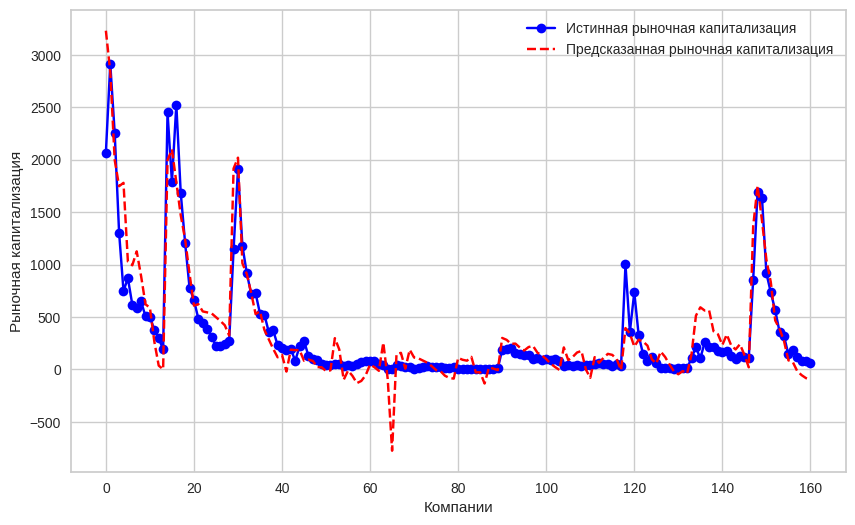

In [ ]:
actual_market_cap = df['Рыночная капитализация']

lasso_model = create_model('lasso')
evaluate_model(lasso_model)
tuned_lasso_model = tune_model(lasso_model)
lasso_predictions = predict_model(tuned_lasso_model, data=new_data)

# Предсказанная 'Рыночная капитализация'
lasso_predicted_market_cap = lasso_predictions['prediction_label']

# График
plt.figure(figsize=(10, 6))

# Изобразим истинную 'Рыночную капитализацию'
plt.plot(actual_market_cap, label='Истинная рыночная капитализация', color='blue', marker='o')

# Изобразим предсказанную 'Рыночную капитализацию'
plt.plot(lasso_predicted_market_cap, label='Предсказанная рыночная капитализация', color='red', linestyle='--', marker='x')

plt.xlabel('Компании')
plt.ylabel('Рыночная капитализация')
plt.legend()
plt.show()